# Exploring

In [1]:
import pandas as pd

df = pd.read_csv('Resumes_2/Resume/Resume.csv')
df2 = pd.read_csv('resumes_2.csv')

print(df.head(10))
print(df2.head())

print(df.shape)
print(df2.shape)

df_combined = pd.concat([df, df2], ignore_index=True)
print(df_combined.head())

print(df_combined.shape)

print(df_combined.info())

print(df_combined['Category'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: 'Resumes_2/Resume/Resume.csv'

In [ ]:
df_combined.head(10)

,ID,Resume_str,Resume_html,Category,Resume
0,16852973.0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
1,22323967.0,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,NaN
2,33176873.0,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
3,27018550.0,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
4,17812897.0,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
5,11592605.0,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
6,25824789.0,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
7,15375009.0,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
8,11847784.0,HR SPECIALIST Summary Posses...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN
9,32896934.0,HR CLERK Summary Translates ...,"<div class=""fontsize fontface vmargins hmargin...",HR,NaN


# Cleaning

In [ ]:
# Combine the 'Resume' and 'Resume_str' columns
df_combined['Combined_Resume'] = df_combined.apply(
    lambda row: (row['Resume'] if pd.notna(row['Resume']) else "") + " " + (row['Resume_str'] if pd.notna(row['Resume_str']) else ""), axis=1
)

print(df_combined[['Resume', 'Resume_str', 'Combined_Resume']].head())

print(df_combined.isnull().sum())

df_combined['Combined_Resume'] = df_combined['Combined_Resume'].fillna('')


df_combined.drop(columns=['ID', 'Resume_html'], inplace=True, errors='ignore')


print(df_combined['Category'].value_counts())

  Resume                                         Resume_str  \
0    NaN           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1    NaN           HR SPECIALIST, US HR OPERATIONS      ...   
2    NaN           HR DIRECTOR       Summary      Over 2...   
3    NaN           HR SPECIALIST       Summary    Dedica...   
4    NaN           HR MANAGER         Skill Highlights  ...   

                                     Combined_Resume  
0            HR ADMINISTRATOR/MARKETING ASSOCIATE...  
1            HR SPECIALIST, US HR OPERATIONS     ...  
2            HR DIRECTOR       Summary      Over ...  
3            HR SPECIALIST       Summary    Dedic...  
4            HR MANAGER         Skill Highlights ...  
ID                  400
Resume_str          400
Resume_html         400
Category              0
Resume             2484
Combined_Resume       0
dtype: int64
Category
INFORMATION-TECHNOLOGY                120
BUSINESS-DEVELOPMENT                  120
ACCOUNTANT                            118

# Skills List

In [ ]:
skills_list = [
    "Communication", "Teamwork", "Problem Solving", "Leadership", "Time Management","Adaptability", "Creativity", "Work Ethic", "Critical Thinking", "Conflict Resolution", 
    "Python", "Java", "C++", "JavaScript", "HTML", "CSS", "React", "Angular", "SQL", "Tableau", "TensorFlow", "Keras", "Scikit-learn", "MongoDB", "Oracle", "Firewalls", 
    "VPN", "AWS", "Azure", "Google Cloud", "Linux", "Windows Server", "iOS", "Android", "React Native", "Financial Modeling", "Investment Analysis", "Risk Management", 
    "Auditing", "Budgeting","Forecasting", "Accounting", "Strategic Planning", "Market Analysis", "Sales Strategy","Customer Relationship Management (CRM)", "Project Management", 
    "Negotiation", "Recruitment","Payroll", "Employee Relations", "SEO", "SEM", "Digital Marketing", "Content Marketing","Lead Generation", "Brand Management", "Market Research", 
    "Email Marketing","Social Media Marketing", "Sales Forecasting", "Sales Presentations", "Medical Terminology", "Patient Care", "Clinical Research", "Electronic Health Records (EHR)", 
    "Electronic Medical Records (EMR)", "Healthcare Administration", "Nursing", "AutoCAD", "SolidWorks", "Quality Assurance", "Product Development", "Systems Engineering", 
    "Mechanical Engineering", "Electrical Engineering", "Chemical Engineering", "Curriculum Development", "Classroom Management", "Educational Technology", "Special Education", 
    "Teaching Strategies", "Legal Research", "Contract Law", "Litigation", "Compliance", "Intellectual Property Law", "Corporate Law", "Talent Acquisition", 
    "Employee Engagement", "Performance Management", "HR Compliance", "Benefits Administration", "Network Security", "Database Management", "System Administration", "IT Support", 
    "Software Development Lifecycle (SDLC)", "Cybersecurity", "Supply Chain Management", "Logistics", "Inventory Management", "Operational Efficiency", "Machine Learning", 
    "Data Analysis", "Data Visualization", "Artificial Intelligence", "Deep Learning", "Big Data Technologies", "Graphic Design", "UX/UI Design", "Video Editing", "Animation", 
    "Photography", "Customer Support", "Client Relations", "Service Level Agreement (SLA) Management", "Project Planning", "Site Management", "Real Estate Law", "Property Management", 
    "Lean Manufacturing", "Six Sigma", "Production Planning", "Supply Chain Optimization","Media Relations", "Press Release Writing", "Public Speaking", "Event Planning", 
    "Merchandising", "Sales Reporting", "Customer Experience Management", "Event Coordination","Guest Services", "Travel Planning", "Sustainability Practices", 
    "Environmental Impact Assessment", "Conservation Planning", "Agronomy", "Animal Nutrition", "Farm Management", "Hydrogeology", "Sustainability Consulting", 
    "Veterinary Skills", "Acting", "Artistry", "Camera Operation", "Composing", "Dancing","Entertainment Management", "Bulk Earthworks", "Carpentry", "Civil Engineering", "Concrete Work", 
    "Construction Management", "Crane Operation", "Masonry", "Plumbing", "Educational Consulting", "Teaching", "School Administration", "University Lecturing", "Energy Engineering", 
    "Environmental Technology", "Solar Consultancy", "Urban Planning", "Wind Turbine Technology", "Accessory Design", "Fashion Design", "Fashion Wholesaling", "Footwear Design", "Textile Design", 
    "Certified Public Accounting (CPA)", "Financial Analysis", "Financial Planning", "Investment Banking", "Private Equity", "Personal Training", "Group Fitness Instruction", 
    "Sports Coaching", "Fitness Technology", "Hotel Management", "Housekeeping", "Restaurant Management", "Sommelier Skills", "Tour Guiding", "Travel Planning", 
    "Application Development", "Information Security Analysis", "Software Engineering", "Web Development", "Aerodynamics", "Robotics", "Nanotechnology", "Biomedical Engineering", 
    "Astronautics", "Marine Engineering", "Aerospace Engineering", "Civil Drafting", "Structural Analysis", "HVAC Systems", "Hydraulics", "Pneumatics", "Project Coordination", 
    "Proposal Writing", "Risk Assessment", "Technical Writing", "Systems Architecture","Agile Methodologies", "Scrum Master", "Lean Six Sigma", "Lean Start-up", "Bioinformatics", 
    "Biostatistics", "Molecular Biology", "Genomics", "Proteomics", "Clinical Trials", "Pharmaceutical Research", "Pharmacovigilance", "Regulatory Affairs", "Medical Imaging", 
    "Health Informatics", "Telemedicine", "Patient Advocacy", "Health Policy", "Epidemiology","Veterinary Medicine", "Dentistry", "Optometry", "Chiropractic", "Occupational Therapy", 
    "Physical Therapy", "Radiology", "Surgery", "Pediatrics", "Geriatrics", "Dermatology", "Psychiatry", "Neurology", "Oncology", "Cardiology", "Anesthesiology", "Internal Medicine", 
    "Family Medicine", "Emergency Medicine", "Obstetrics and Gynecology", "Pathology", "Hotel Operations", "Hospitality Management", "Event Management", "Catering", "Bar Management", 
    "Wine Tasting", "Food and Beverage Management", "Hospitality Marketing", "Revenue Management","Guest Satisfaction", "Front Desk Operations", "Lodging Management", "Tourism Management", 
    "Resort Management", "Club Management", "Travel and Tourism", "Business Strategy", "Business Development", "Change Management", "Organizational Development", 
    "Performance Improvement", "Business Process Reengineering", "Corporate Communications", "Corporate Governance", "Corporate Social Responsibility", "Executive Leadership", 
    "Leadership Development", "Market Development", "Operational Excellence", "Organizational Design", "Organizational Leadership", "Performance Management", "Process Improvement",
    "Professional Development", "Strategic Communications", "Talent Management", "Technology Integration", "Workforce Development", "Business Analysis", "Business Intelligence",
    "Business Planning", "Customer Insight", "Data Mining", "Data Science","Data Warehousing", "Decision Support", "Financial Management", "Human Resources", "Information Management", 
    "Knowledge Management", "Management Consulting", "Operations Management", "Organizational Culture","Organizational Effectiveness", "Quality Management", "Sales Management", "Service Management", 
    "Supply Chain Analysis", "Workforce Planning"
]


# Preprocessing

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Preprocessing function using lemmatization
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Apply preprocessing to the combined resume text
df_combined['Combined_Resume'] = df_combined['Combined_Resume'].apply(lambda x: preprocess_text(x) if x.strip() != "" else "")

# Remove rows with empty 'Combined_Resume' after preprocessing
df_combined = df_combined[df_combined['Combined_Resume'].str.strip() != ""]

print(df_combined[['Combined_Resume']].head())

                                     Combined_Resume
0             HR ADMINISTRATOR MARKETING ASSOCIAT...
1             HR SPECIALIST hr operation        S...
2             hr director        Summary       20...
3             hr SPECIALIST        Summary     De...
4             HR MANAGER          Skill Highlight...


# Train-Test Split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize the vectorizer with n-grams
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the entire data
X_tfidf = vectorizer.fit_transform(df_combined['Combined_Resume'])

# Prepare the labels
y = df_combined['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Model Training

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', probability=True)

# Evaluation

In [ ]:
# Logistic Regression
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Logistic Regression Classification Report:")
print(report_log_reg)


Logistic Regression Accuracy: 0.7244367417677643
Logistic Regression Classification Report:
                                    precision    recall  f1-score   support

                        ACCOUNTANT       0.74      0.89      0.81        19
                          ADVOCATE       0.69      0.65      0.67        31
                       AGRICULTURE       0.62      0.38      0.48        13
                           APPAREL       0.36      0.45      0.40        11
                              ARTS       0.33      0.24      0.28        21
                        AUTOMOBILE       0.50      0.83      0.62         6
                          AVIATION       0.79      0.76      0.78        25
                           BANKING       0.67      0.59      0.62        17
                               BPO       0.00      0.00      0.00         2
              BUSINESS-DEVELOPMENT       0.61      0.61      0.61        18
                 Backend Developer       1.00      1.00      1.00      

# Logistic Regression Confusion Matrix

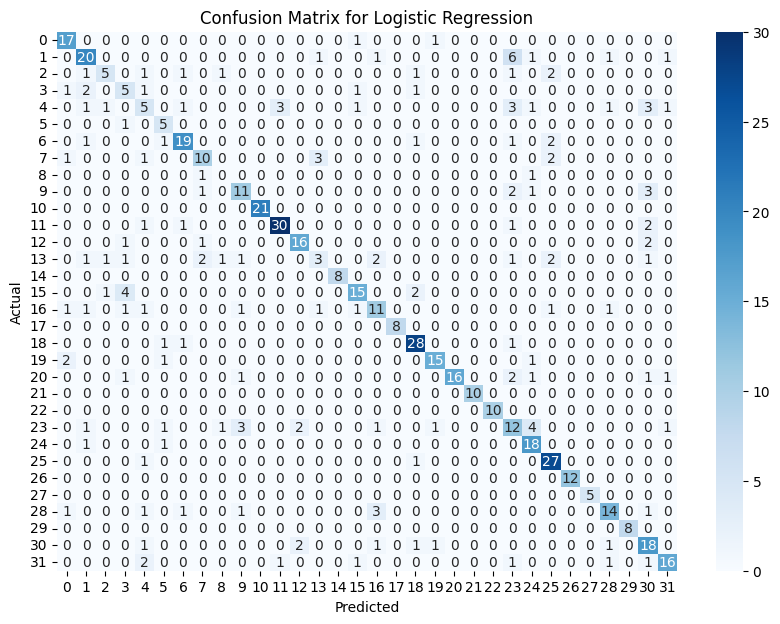

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Compute the confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [ ]:
# Random Forest
# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Accuracy: 0.7712305025996534
Random Forest Classification Report:
                                    precision    recall  f1-score   support

                        ACCOUNTANT       0.69      0.95      0.80        19
                          ADVOCATE       0.82      0.74      0.78        31
                       AGRICULTURE       0.83      0.38      0.53        13
                           APPAREL       0.46      0.55      0.50        11
                              ARTS       0.75      0.14      0.24        21
                        AUTOMOBILE       1.00      0.50      0.67         6
                          AVIATION       0.82      0.92      0.87        25
                           BANKING       0.56      0.53      0.55        17
                               BPO       0.00      0.00      0.00         2
              BUSINESS-DEVELOPMENT       0.88      0.78      0.82        18
                 Backend Developer       1.00      1.00      1.00        21
       

/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Random Forest Confusion Matrix

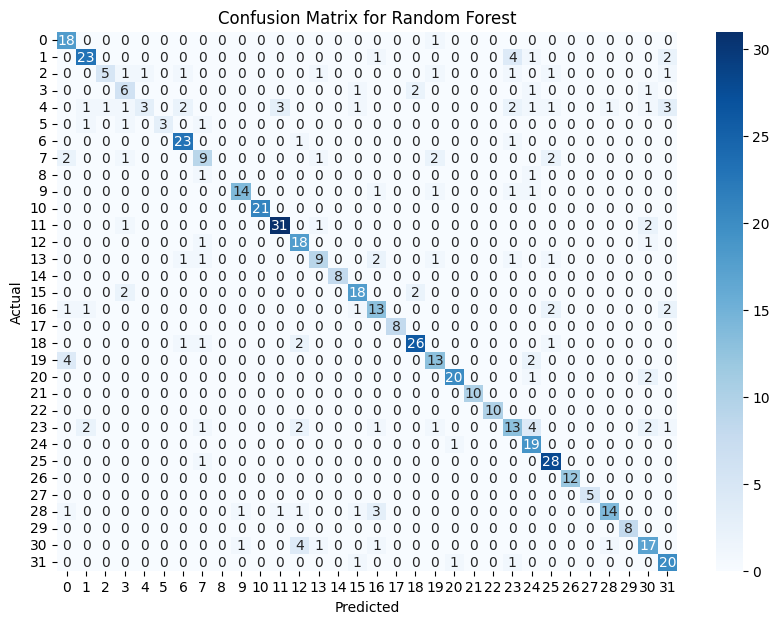

In [ ]:
# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
# SVM
# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)


SVM Accuracy: 0.708838821490468
SVM Classification Report:
                                    precision    recall  f1-score   support

                        ACCOUNTANT       0.81      0.89      0.85        19
                          ADVOCATE       0.56      0.65      0.60        31
                       AGRICULTURE       0.50      0.31      0.38        13
                           APPAREL       0.23      0.45      0.30        11
                              ARTS       0.33      0.33      0.33        21
                        AUTOMOBILE       0.50      0.33      0.40         6
                          AVIATION       0.75      0.72      0.73        25
                           BANKING       0.60      0.53      0.56        17
                               BPO       0.00      0.00      0.00         2
              BUSINESS-DEVELOPMENT       0.73      0.61      0.67        18
                 Backend Developer       1.00      1.00      1.00        21
                            

# SVM Confusion Matrix

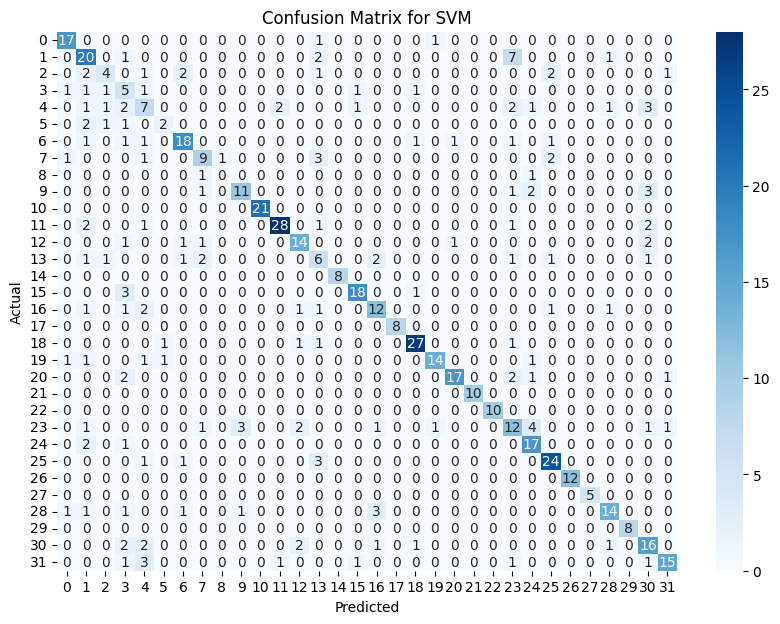

In [ ]:
# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Compute the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# Hypotheses Testing

Decision Tree Accuracy: 0.6637781629116117
Decision Tree Classification Report:
                                    precision    recall  f1-score   support

                        ACCOUNTANT       0.75      0.63      0.69        19
                          ADVOCATE       0.83      0.61      0.70        31
                       AGRICULTURE       0.42      0.38      0.40        13
                           APPAREL       0.32      0.64      0.42        11
                              ARTS       0.28      0.24      0.26        21
                        AUTOMOBILE       0.33      0.50      0.40         6
                          AVIATION       0.61      0.76      0.68        25
                           BANKING       0.24      0.29      0.26        17
                               BPO       0.00      0.00      0.00         2
              BUSINESS-DEVELOPMENT       0.44      0.44      0.44        18
                 Backend Developer       1.00      0.95      0.98        21
       

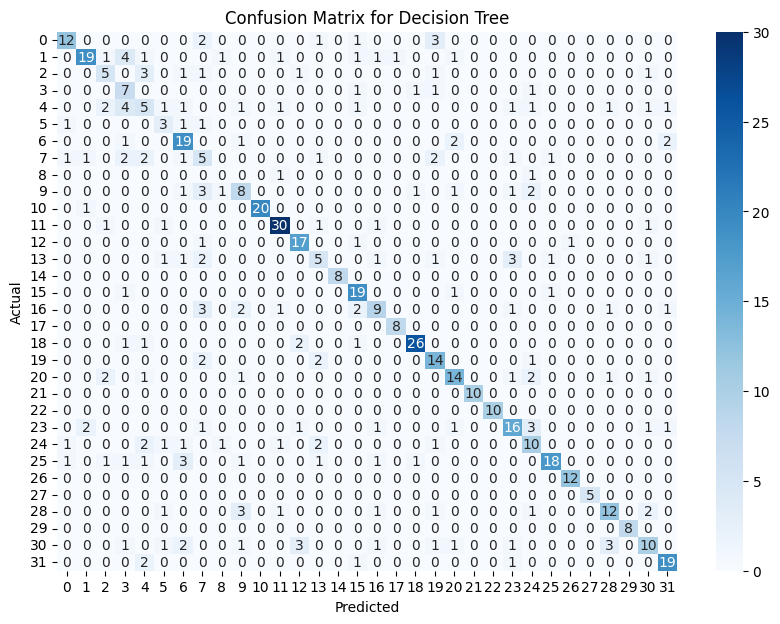

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:")
print(report_dt)

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_rel

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to integers for each prediction array
y_pred_dt_encoded = label_encoder.fit_transform(y_pred_dt)
y_pred_log_reg_encoded = label_encoder.transform(y_pred_log_reg)
y_pred_rf_encoded = label_encoder.transform(y_pred_rf)
y_pred_svm_encoded = label_encoder.transform(y_pred_svm)

# Perform paired t-tests between Decision Tree and other models
t_stat_log, p_value_log = ttest_rel(y_pred_dt_encoded, y_pred_log_reg_encoded)
t_stat_rf, p_value_rf = ttest_rel(y_pred_dt_encoded, y_pred_rf_encoded)
t_stat_svm, p_value_svm = ttest_rel(y_pred_dt_encoded, y_pred_svm_encoded)

print(f"Paired t-test between Decision Tree and Logistic Regression: t-stat={t_stat_log}, p-value={p_value_log}")
print(f"Paired t-test between Decision Tree and Random Forest: t-stat={t_stat_rf}, p-value={p_value_rf}")
print(f"Paired t-test between Decision Tree and SVM: t-stat={t_stat_svm}, p-value={p_value_svm}")


Paired t-test between Decision Tree and Logistic Regression: t-stat=-2.243553165335559, p-value=0.02524036248740249
Paired t-test between Decision Tree and Random Forest: t-stat=-3.390459927141822, p-value=0.0007455322614428667
Paired t-test between Decision Tree and SVM: t-stat=-0.7282086281601489, p-value=0.4667818146848729


# For Hypothesis 2: Impact of Skill Gap Analysis on Course Recommendations

# Hyperparameter Tuning

In [ ]:
# Random Forest
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_rf = random_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Ensure that the model is fitted
best_rf = random_search_rf.best_estimator_

# Predict on the test data
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   8.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=

/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saadiyashaikh/miniconda3/envs/demo1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print("Best parameters for Logistic Regression:", best_params_lr)

# Ensure that the model is fitted
best_lr = grid_search_lr.best_estimator_

# Predict on the test data
y_pred_lr = best_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Logistic Regression Classification Report:")
print(report_lr)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.2s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.2s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.4s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.4s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.4s
[CV] END ...........................C=0.01, solver=liblinear; total time=   1.5s
[CV] END ...........................C=0.01, solver=liblinear; total time=   1.5s
[CV] END ..................................C=1, solver=lbfgs; total time=   1.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   1.6s
[CV] END ..................................C=1, solver=lbfgs; total time=   1.1s
[CV] END ............................C=0.1, solv

# Testing

In [ ]:
def extract_skills(text, skills_list):
    text = text.lower()
    extracted_skills = [skill for skill in skills_list if skill.lower() in text]
    return extracted_skills

# Combine 'Resume' and 'Resume_str' columns
df_combined['Combined_Resume'] = df_combined.apply(
    lambda row: (row['Resume'] if pd.notna(row['Resume']) else "") + " " + (row['Resume_str'] if pd.notna(row['Resume_str']) else ""), axis=1
)

# Fill NaN values in 'Combined_Resume' with an empty string
df_combined['Combined_Resume'] = df_combined['Combined_Resume'].fillna('')

# Extract skills from each resume
df_combined['Extracted_Skills'] = df_combined['Combined_Resume'].apply(lambda x: extract_skills(x, skills_list))

df_combined[['Category', 'Extracted_Skills']].head(20)


,Category,Extracted_Skills
0,HR,"[Leadership, Time Management, Conflict Resolut..."
1,HR,"[Communication, Project Management, Recruitmen..."
2,HR,"[Leadership, Strategic Planning, Project Manag..."
3,HR,"[Communication, Conflict Resolution, Payroll, ..."
4,HR,"[Teamwork, Problem Solving, Leadership, Confli..."
5,HR,"[Time Management, Strategic Planning, Recruitm..."
6,HR,"[Leadership, Conflict Resolution, Project Mana..."
7,HR,"[Communication, AWS, Project Management, Recru..."
8,HR,"[Communication, Leadership, AWS, Market Analys..."
9,HR,"[AWS, Accounting, Recruitment, Payroll, Employ..."
